### Analyse des levées françaises de 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
from itertools import islice


plt.style.use('fivethirtyeight')



In [2]:
df = pd.read_csv("levee2019.csv")

# format amount raised
df["amount_raised"] = (df["amount_raised"]
                       .str.replace("M", "000000")
                       .str.replace(" ","")
                       .str.replace(".", "")
                       .str.replace("€","")
                       .str.replace("NC","0")
                       .str.replace('\D', '')
                       .astype(int)
                       ) /1000000



In [3]:
# format investors
df["investors"] = (df["investors"]
                   .str.replace("[", "")
                   .str.replace("]", "")
                   .str.replace("'", "")
                   .str.split(", ")
                  )

# format sectors
df["sector"] = (df["sector"]
                   .str.replace("[", "")
                   .str.replace("]", "")
                   .str.replace("'", "")
                   .str.split(", ")
                  )



In [4]:
# get number of investors per week
df["number_of_investors"] = df.investors.apply(len)

In [5]:
df.head()

,week_number,startup,amount_raised,sector,description,investors,number_of_investors
0,2,Talentsoft,45.0,"[HR, Education, Training, Jobbing]",Talentsoft develops SaaS-based integrated tale...,"[Francisco Partners, Bpifrance, Goldman Sachs]",3
1,2,b network,30.0,"[Logistic, Retail]",b network is an event agency that developed a ...,"[Ring Capital, business angels]",2
2,2,Monbuilding,2.0,"[Real Estate, Construction]",Monbuilding provides an application to facilit...,"[Naxicap Partners, business angels]",2
3,2,Teambrain,15.0,"[Real Estate, Construction]",Teambrain (formerly Kapitaliser) has developed...,[ide Capital],1
4,2,PapyHappy,15.0,"[Real Estate, Construction]",PapyHappy offers seniors to help them find hou...,"[BRD IT, BCF Croissance & Innovation, Bpifranc...",4


## Plotting weekly fundraisings

In [19]:
# groupby object to extract aggregate values
per_week = df.groupby("week_number")

# dataframe creation for plotting purposes
d = {'weekly_amount': per_week.amount_raised.sum(), "total_fundraisings": per_week.size()}
df_week_recap = pd.DataFrame(data = d)
df_week_recap.head()


,weekly_amount,total_fundraisings
week_number,,
2,122.00,7
3,259.35,18
4,173.65,11
5,174.65,12
6,468.07,17


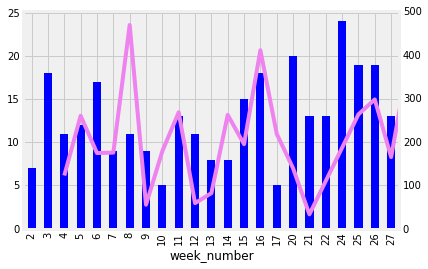

In [26]:
plt.figure()
ax1 = df_week_recap["weekly_amount"].plot(secondary_y = True, color = 'violet')
ax2 = df_week_recap["total_fundraisings"].plot(kind='bar', color = 'blue')
ax2.grid(True)
ax1.grid(False)
ax1.set_ylim([0,500])
plt.show()


## Additional analysis

In [7]:
# counter for investor involvment
investisseurs = {}

# counter for sector
sectors = {}

In [8]:
# counting functions

# ... for investor involvment
def class_investors(investors):
    for i in investors:
        if i not in investisseurs:
            investisseurs[i] = 1
        else:
            investisseurs[i] += 1
            
            
# ... for sector count
def class_sector(sector):
    for i in sector:
        if i not in sectors:
            sectors[i] = 1
        else:
            sectors[i] += 1

In [16]:
df["investors"].apply(class_investors)

# transforms to Series
investors = pd.Series(investisseurs)
investors.head()

Francisco Partners      4
Bpifrance             168
Goldman Sachs           4
Ring Capital            8
business angels       476
dtype: int64

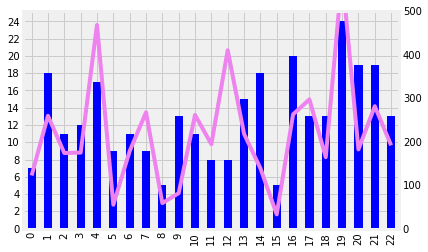